1 - Verificar o número de casos e mortes por COVID-19 nos Estados Unidos da América (por estado)

In [101]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt

covid_df = pd.read_csv("us-states.csv")

population_df = pd.read_csv("us_population_estimates.csv")

In [102]:
#retirar da dataframe apenas as colunas que interessam
population_df = population_df[["STATE", "NAME", "POPESTIMATE2020",
                               "POPESTIMATE2021", "POPESTIMATE2022"]]

population_df

,STATE,NAME,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022
0,0,United States,331511512,332031554,333287557
1,0,Northeast Region,57448898,57259257,57040406
2,0,New England,15074473,15121745,15129548
3,0,Middle Atlantic,42374425,42137512,41910858
4,0,Midwest Region,68961043,68836505,68787595
...,...,...,...,...,...
61,53,Washington,7724031,7740745,7785786
62,54,West Virginia,1791420,1785526,1775156
63,55,Wisconsin,5896271,5880101,5892539
64,56,Wyoming,577605,579483,581381


In [103]:
#retirar regiões com código 0
population_df = population_df[population_df["STATE"] != 0].reset_index(drop=True)

#retirar "District of Columbia" e "Puerto Rico"
population_df.drop(index=[8, 51], axis=0).reset_index(drop=True)

,STATE,NAME,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022
0,1,Alabama,5031362,5049846,5074296
1,2,Alaska,732923,734182,733583
2,4,Arizona,7179943,7264877,7359197
3,5,Arkansas,3014195,3028122,3045637
4,6,California,39501653,39142991,39029342
5,8,Colorado,5784865,5811297,5839926
6,9,Connecticut,3597362,3623355,3626205
7,10,Delaware,992114,1004807,1018396
8,12,Florida,21589602,21828069,22244823
9,13,Georgia,10729828,10788029,10912876


In [104]:
#Dicionário de abreviaturas por estado
us_states = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

#converter os nomes dos estados nas abreviaturas correspondentes
population_df["NAME"] = population_df["NAME"].map(us_states)

In [105]:
#retirar null values
population_df = population_df.dropna().reset_index(drop=True)

In [106]:
population_df.head(10)

,STATE,NAME,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022
0,1,AL,5031362,5049846,5074296
1,2,AK,732923,734182,733583
2,4,AZ,7179943,7264877,7359197
3,5,AR,3014195,3028122,3045637
4,6,CA,39501653,39142991,39029342
5,8,CO,5784865,5811297,5839926
6,9,CT,3597362,3623355,3626205
7,10,DE,992114,1004807,1018396
8,12,FL,21589602,21828069,22244823
9,13,GA,10729828,10788029,10912876


In [107]:
#dar "unpivot" da dataframe para obter correspondências Estado-Ano-População
population_df = population_df.melt(id_vars=['NAME'], 
                           value_vars=['POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022'],
                           var_name='year', 
                           value_name='population')

In [108]:
#organizar dataframe por nome e ano, respetivamente
population_df = population_df.sort_values(by=["NAME", "year"]).reset_index(drop=True)

population_df

,NAME,year,population
0,AK,POPESTIMATE2020,732923
1,AK,POPESTIMATE2021,734182
2,AK,POPESTIMATE2022,733583
3,AL,POPESTIMATE2020,5031362
4,AL,POPESTIMATE2021,5049846
...,...,...,...
145,WV,POPESTIMATE2021,1785526
146,WV,POPESTIMATE2022,1775156
147,WY,POPESTIMATE2020,577605
148,WY,POPESTIMATE2021,579483


In [109]:
#converter "POPESTIMATES" nos respetivos anos
population_df["year"] = population_df["year"].replace(["POPESTIMATE2020",
                                                       "POPESTIMATE2021",
                                                       "POPESTIMATE2022"],
                                                       [2020, 2021, 2022])

population_df

C:\Users\joaop\AppData\Local\Temp\ipykernel_10648\3992699902.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,NAME,year,population
0,AK,2020,732923
1,AK,2021,734182
2,AK,2022,733583
3,AL,2020,5031362
4,AL,2021,5049846
...,...,...,...
145,WV,2021,1785526
146,WV,2022,1775156
147,WY,2020,577605
148,WY,2021,579483


In [110]:
#alterar o nome da coluna "NAME" para "state"
population_df = population_df.rename(columns={"NAME": "state"})

population_df

,state,year,population
0,AK,2020,732923
1,AK,2021,734182
2,AK,2022,733583
3,AL,2020,5031362
4,AL,2021,5049846
...,...,...,...
145,WV,2021,1785526
146,WV,2022,1775156
147,WY,2020,577605
148,WY,2021,579483


In [111]:
#converter a coluna de datas na covid dataframe em datetime object
covid_df['date'] = pd.to_datetime(covid_df['date'])

#Remover resultados relativos a 2023
covid_df = covid_df[covid_df['date'].dt.year != 2023]
covid_df

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
57345,2022-12-31,Virginia,51,2205518,22793
57346,2022-12-31,Washington,53,1883676,15067
57347,2022-12-31,West Virginia,54,624721,7795
57348,2022-12-31,Wisconsin,55,1960884,15860


In [112]:
#Verificar se existem valores nulos ou inexistentes
print(covid_df.isnull().sum())
print(covid_df.isnull().values.any())

date      0
state     0
fips      0
cases     0
deaths    0
dtype: int64
False


In [113]:
#Extrair o ano de cada uma das datas
covid_df['year'] = covid_df['date'].dt.year

covid_df.head(10)

,date,state,fips,cases,deaths,year
0,2020-01-21,Washington,53,1,0,2020
1,2020-01-22,Washington,53,1,0,2020
2,2020-01-23,Washington,53,1,0,2020
3,2020-01-24,Illinois,17,1,0,2020
4,2020-01-24,Washington,53,1,0,2020
5,2020-01-25,California,6,1,0,2020
6,2020-01-25,Illinois,17,1,0,2020
7,2020-01-25,Washington,53,1,0,2020
8,2020-01-26,Arizona,4,1,0,2020
9,2020-01-26,California,6,2,0,2020


In [114]:
#Ordenar a dataframe por estado e data
sorted_df = covid_df.sort_values(by=['state', 'date'])

sorted_df

,date,state,fips,cases,deaths,year
586,2020-03-13,Alabama,1,6,0,2020
637,2020-03-14,Alabama,1,12,0,2020
689,2020-03-15,Alabama,1,23,0,2020
742,2020-03-16,Alabama,1,29,0,2020
795,2020-03-17,Alabama,1,39,0,2020
...,...,...,...,...,...,...
57125,2022-12-27,Wyoming,56,182847,1959,2022
57181,2022-12-28,Wyoming,56,182847,1959,2022
57237,2022-12-29,Wyoming,56,182847,1959,2022
57293,2022-12-30,Wyoming,56,182847,1959,2022


In [115]:
#obter casos por ano por estado fazendo a diferença entre primeiros e ultimos valores do ano
cases_per_year_state = sorted_df.groupby(by=['state', 'year']).agg(
    new_cases=('cases', lambda x: x.iloc[-1] - x.iloc[0]),
    new_deaths=('deaths', lambda x: x.iloc[-1] - x.iloc[0])
).reset_index()

cases_per_year_state

,state,year,new_cases,new_deaths
0,Alabama,2020,361220,4827
1,Alabama,2021,530867,11583
2,Alabama,2022,677023,4753
3,Alaska,2020,46739,198
4,Alaska,2021,109390,756
...,...,...,...,...
162,Wisconsin,2021,598146,5916
163,Wisconsin,2022,840215,4687
164,Wyoming,2020,44408,438
165,Wyoming,2021,71229,1088


In [116]:
#Dicionário de abreviaturas por estado
us_states = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

#Converte os nomes dos estados em abreviaturas
cases_per_year_state['state'] = cases_per_year_state['state'].map(us_states)

In [117]:
cases_per_year_state.head(10)

,state,year,new_cases,new_deaths
0,AL,2020,361220,4827
1,AL,2021,530867,11583
2,AL,2022,677023,4753
3,AK,2020,46739,198
4,AK,2021,109390,756
5,AK,2022,145644,454
6,NaN,2021,10,0
7,NaN,2022,8255,34
8,AZ,2020,523828,8879
9,AZ,2021,851221,15214


In [118]:
#remover null values
cases_per_year_state =  cases_per_year_state.dropna().reset_index(drop=True)

cases_per_year_state

,state,year,new_cases,new_deaths
0,AL,2020,361220,4827
1,AL,2021,530867,11583
2,AL,2022,677023,4753
3,AK,2020,46739,198
4,AK,2021,109390,756
...,...,...,...,...
145,WI,2021,598146,5916
146,WI,2022,840215,4687
147,WY,2020,44408,438
148,WY,2021,71229,1088


In [119]:
#unir as population e covid dataframes
merged_df = cases_per_year_state.merge(population_df,how = "inner", on= ["state", "year"])

merged_df.dtypes

state         object
year           int32
new_cases      int64
new_deaths     int64
population     int64
dtype: object

In [120]:
#converter nº de casos e mortes para int
conversions = {"new_cases": int, "new_deaths": int}

merged_df = merged_df.astype(conversions)

merged_df.dtypes

state         object
year           int32
new_cases      int64
new_deaths     int64
population     int64
dtype: object

In [121]:
#calcular casos e mortes por 100 habitantes em cada estado e ano
merged_df["cases_per_hundred"] = (merged_df["new_cases"] / merged_df["population"]) * 100

merged_df["deaths_per_hundred"] = (merged_df["new_deaths"] / merged_df["population"]) * 100

merged_df.head(10)

,state,year,new_cases,new_deaths,population,cases_per_hundred,deaths_per_hundred
0,AL,2020,361220,4827,5031362,7.179368,0.095938
1,AL,2021,530867,11583,5049846,10.512538,0.229373
2,AL,2022,677023,4753,5074296,13.342206,0.093668
3,AK,2020,46739,198,732923,6.377068,0.027015
4,AK,2021,109390,756,734182,14.899575,0.102972
5,AK,2022,145644,454,733583,19.853786,0.061888
6,AZ,2020,523828,8879,7179943,7.295713,0.123664
7,AZ,2021,851221,15214,7264877,11.716936,0.209419
8,AZ,2022,988626,7828,7359197,13.433884,0.106370
9,AR,2020,225137,3676,3014195,7.469225,0.121956


In [ ]:
#Gráfico novos casos por estado por ano nos USA
fig = px.choropleth(
    merged_df,
    locations="state",
    locationmode="USA-states",
    color="cases_per_hundred",
    labels={"cases_per_hundred": "Cases"},
    hover_name="state",
    color_continuous_scale="Reds",
    scope="usa",
    facet_col="year",
    title="Yearly New COVID-19 Cases per State in the U.S. (per hundred)"
)

#Mostrar mapa
fig.show()

In [ ]:
#Gráficos de mortes por estado por ano nos USA
fig = px.choropleth(
    merged_df,
    locations="state",
    locationmode="USA-states",
    color="deaths_per_hundred",
    labels={"deaths_per_hundred": "Deaths"},
    hover_name="state",
    color_continuous_scale="Reds",
    scope="usa",
    facet_col="year",
    title="Yearly New COVID-19 Deaths per State in the U.S."
)

#Mostrar mapa
fig.show()

In [124]:
#retirar o mês de cada 
covid_df["month"] = covid_df["date"].dt.month

sorted_season_df = covid_df.sort_values(by=["state", "year", "month"])

sorted_season_df

,date,state,fips,cases,deaths,year,month
586,2020-03-13,Alabama,1,6,0,2020,3
637,2020-03-14,Alabama,1,12,0,2020,3
689,2020-03-15,Alabama,1,23,0,2020,3
742,2020-03-16,Alabama,1,29,0,2020,3
795,2020-03-17,Alabama,1,39,0,2020,3
...,...,...,...,...,...,...,...
57125,2022-12-27,Wyoming,56,182847,1959,2022,12
57181,2022-12-28,Wyoming,56,182847,1959,2022,12
57237,2022-12-29,Wyoming,56,182847,1959,2022,12
57293,2022-12-30,Wyoming,56,182847,1959,2022,12


In [125]:
#converter os meses para as respetivas estações
winter = [12, 1, 2]
spring = [3, 4, 5]
summer = [6, 7, 8]
fall = [9, 10, 11]

sorted_season_df["month"] = sorted_season_df["month"].apply(lambda x: "Winter" if x in winter else
                                      "Spring" if x in spring else
                                       "Summer" if x in summer else
                                        "Fall")

sorted_season_df

,date,state,fips,cases,deaths,year,month
586,2020-03-13,Alabama,1,6,0,2020,Spring
637,2020-03-14,Alabama,1,12,0,2020,Spring
689,2020-03-15,Alabama,1,23,0,2020,Spring
742,2020-03-16,Alabama,1,29,0,2020,Spring
795,2020-03-17,Alabama,1,39,0,2020,Spring
...,...,...,...,...,...,...,...
57125,2022-12-27,Wyoming,56,182847,1959,2022,Winter
57181,2022-12-28,Wyoming,56,182847,1959,2022,Winter
57237,2022-12-29,Wyoming,56,182847,1959,2022,Winter
57293,2022-12-30,Wyoming,56,182847,1959,2022,Winter


In [126]:
#agrupar o número de casos estação
cases_per_season = sorted_season_df.groupby(["month"])["cases"].sum()
deaths_per_season = sorted_season_df.groupby("month")["deaths"].sum()

#converter as séries de volta a dataframes e reindexar para obter o nome das colunas
deaths_per_season = deaths_per_season.to_frame().reset_index()
cases_per_season = cases_per_season.to_frame().reset_index()

In [127]:
#criar 2 gráficos lado a lado para comparar casos e mortes por estação
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "domain"}, {"type": "domain"}]])

#adicionar a informação aos gráficos
fig.add_trace(go.Pie(labels=cases_per_season["month"], values=cases_per_season["cases"], name= "Cases Per Season"), 1, 1)

fig.add_trace(go.Pie(labels=deaths_per_season["month"], values=deaths_per_season["deaths"], name= "Deaths Per Season"), 1, 2)

#criar uma abertura no centro do gráfico
fig.update_traces(hole =.4)

#costumização de aspetos do gráfico
fig.update_layout(title_text= "Cases and Deaths by COVID-19 by Season (US)",
                  annotations = [dict(text="Cases", x= 0.195, y=0.5, showarrow=False, font_size=20),
                                  dict(text="Deaths", x =0.812, y= 0.5, showarrow=False, font_size=20)])

fig.show()

In [148]:
#criar uma dataframe que associa o ano com o número de casos e mortes nesse ano
total_cases_deaths_per_year = cases_per_year_state.groupby("year").sum()
total_cases_deaths_per_year = total_cases_deaths_per_year.drop(columns="state").reset_index()

total_cases_deaths_per_year


,year,new_cases,new_deaths
0,2020,19875385,343612
1,2021,34234604,473934
2,2022,44677715,272555


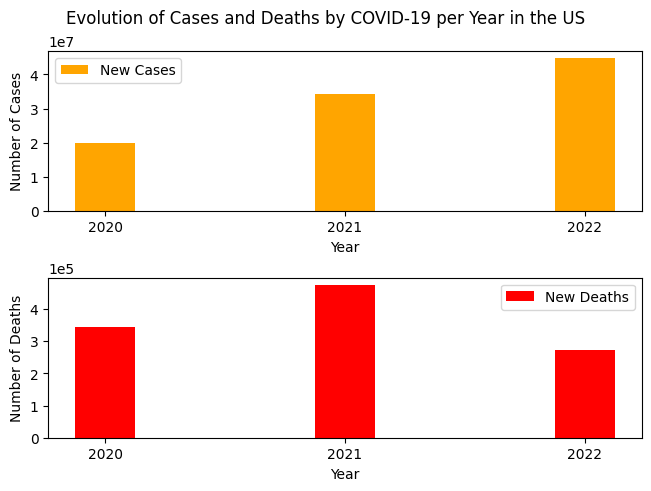

In [182]:
#gráfico de barras para prespetivar os dados acima
x = np.arange(len(total_cases_deaths_per_year["year"]))
width = 0.25

fig, axs = plt.subplots(2, layout="constrained")
fig.suptitle("Evolution of Cases and Deaths by COVID-19 per Year in the US")

#adicionar os dados aos gráficos
axs[0].bar(x, total_cases_deaths_per_year["new_cases"], width,
           label="New Cases", color="orange")
axs[1].bar(x, total_cases_deaths_per_year["new_deaths"], width,
           label="New Deaths", color="red")

#costumizar aspetos dos gáficos
axs[0].set_xlabel("Year")
axs[0].set_ylabel("Number of Cases")
axs[0].set_xticks(x)
axs[0].set_xticklabels(total_cases_deaths_per_year["year"])
axs[0].legend()

axs[1].set_xlabel("Year")
axs[1].set_ylabel("Number of Deaths")
axs[1].set_xticks(x)
axs[1].set_xticklabels(total_cases_deaths_per_year["year"])
axs[1].legend()

plt.ticklabel_format(style="sci", axis="y", scilimits=(0,0))

plt.show()

In [183]:
#taxa de mortalidade total por COVID-19 nos EUA
total_cases = cases_per_year_state["new_cases"].sum()
total_deaths = cases_per_year_state["new_deaths"].sum()

mortality_rate = round((total_deaths/total_cases) * 100, 2)

print(f"Total Mortality Rate: {mortality_rate}%")

Total Mortality Rate: 1.1%


In [186]:
total_cases_deaths_per_year["mortality_rate"] = round(
    (total_cases_deaths_per_year["new_deaths"]/total_cases_deaths_per_year["new_cases"]) *100, 2)

total_cases_deaths_per_year

,year,new_cases,new_deaths,mortality_rate
0,2020,19875385,343612,1.73
1,2021,34234604,473934,1.38
2,2022,44677715,272555,0.61


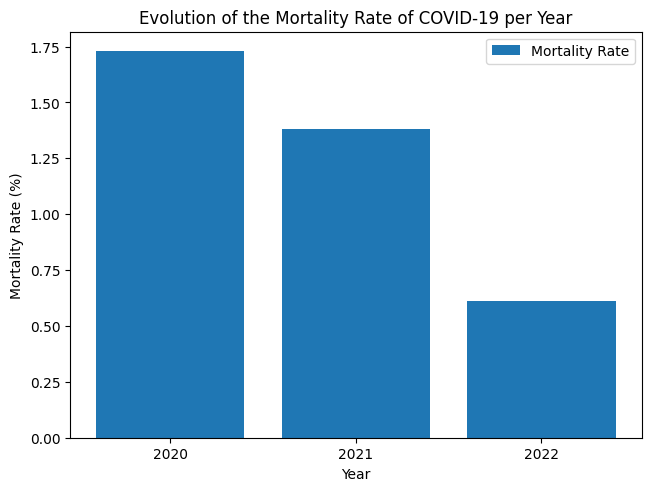

In [197]:
#gráfico de comparação de mortalidade
fig, ax = plt.subplots(layout="constrained")

#fazer o gráfico
ax.bar(total_cases_deaths_per_year["year"],
       total_cases_deaths_per_year["mortality_rate"],
       label="Mortality Rate")

#costumizar o gráfico
ax.set_title("Evolution of the Mortality Rate of COVID-19 per Year")
ax.set_ylabel("Mortality Rate (%)")
ax.set_xlabel("Year")
ax.set_xticks(total_cases_deaths_per_year["year"])
ax.legend()

plt.show()

2 - Visualizar o progresso na vacinação por estado

In [130]:
#importar o ficheiro .csv
vaccine_df = pd.read_csv("us_state_vaccinations.csv")

vaccine_df

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207,NaN,NaN
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222,NaN,NaN
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212,NaN,NaN
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226,NaN,NaN
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7498.0,1529.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54623,2023-05-06,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,133.0,NaN,NaN,NaN
54624,2023-05-07,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,173.0,NaN,NaN,NaN
54625,2023-05-08,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.0,213.0,NaN,NaN,NaN
54626,2023-05-09,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146.0,252.0,NaN,NaN,NaN


In [131]:
#Verificar as diferentes localizações presentes nos dados
unique_locations = vaccine_df["location"].unique()

unique_locations

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'Bureau of Prisons', 'California', 'Colorado', 'Connecticut',
       'Delaware', 'Dept of Defense', 'District of Columbia',
       'Federated States of Micronesia', 'Florida', 'Georgia', 'Guam',
       'Hawaii', 'Idaho', 'Illinois', 'Indian Health Svc', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Long Term Care', 'Louisiana',
       'Maine', 'Marshall Islands', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York State', 'North Carolina', 'North Dakota',
       'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Republic of Palau', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
       'United States', 'Utah', 'Vermont', 'Veterans Health',
       'Virgin Islands', 'Virginia', 'Washington', 'West V

In [132]:
#substituir "New York State" por "New York"
vaccine_df["location"] = vaccine_df["location"].replace(to_replace="New York State", value="New York")

In [133]:
vaccine_df[vaccine_df["location"] == "New York"]

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
33380,2021-01-12,New York,579532.0,1622100.0,543014.0,0.19,2.98,36422.0,2.79,8.34,NaN,NaN,NaN,0.357,NaN,NaN
33381,2021-01-13,New York,632473.0,1796850.0,587865.0,0.23,3.25,44512.0,3.02,9.24,52941.0,52941.0,2721.0,0.352,NaN,NaN
33382,2021-01-14,New York,688576.0,1872625.0,617596.0,NaN,3.54,NaN,3.17,9.63,56103.0,54522.0,2803.0,0.368,NaN,NaN
33383,2021-01-15,New York,757466.0,1884325.0,671311.0,0.38,3.89,73523.0,3.45,9.69,68890.0,59311.0,3049.0,0.402,NaN,NaN
33384,2021-01-16,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59662.0,3067.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34224,2023-05-06,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4989.0,256.0,NaN,NaN,NaN
34225,2023-05-07,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5050.0,260.0,NaN,NaN,NaN
34226,2023-05-08,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5111.0,263.0,NaN,NaN,NaN
34227,2023-05-09,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5172.0,266.0,NaN,NaN,NaN


In [134]:
#Dicionário de abreviaturas por estado
us_states = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

#Substituir os nomes dos estados pelas abreviaturas correspondentes
vaccine_df["location"] = vaccine_df["location"].map(us_states)

vaccine_df

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
0,2021-01-12,AL,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207,NaN,NaN
1,2021-01-13,AL,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222,NaN,NaN
2,2021-01-14,AL,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212,NaN,NaN
3,2021-01-15,AL,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226,NaN,NaN
4,2021-01-16,AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7498.0,1529.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54623,2023-05-06,WY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,133.0,NaN,NaN,NaN
54624,2023-05-07,WY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,173.0,NaN,NaN,NaN
54625,2023-05-08,WY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.0,213.0,NaN,NaN,NaN
54626,2023-05-09,WY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146.0,252.0,NaN,NaN,NaN


In [135]:
#Remover valores que não correspondem a um estado dos EUA
vaccine_df = vaccine_df.dropna(subset=["location"])

#Remover valores de "total_vaccinations_per_hundred" nulos
vaccine_df = vaccine_df.dropna(subset="total_vaccinations_per_hundred")

In [136]:
#verificar se existem valores duplicados
vaccine_df[vaccine_df.duplicated() == True]

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred


In [137]:
#Converter datas da coluna "date" para objetos datetime
vaccine_df["date"] = pd.to_datetime(vaccine_df["date"])

#Extrair o ano de cada uma das datas
vaccine_df['year'] = vaccine_df['date'].dt.year

#Ordenar a dataframe por estado e ano (ascendente)
sorted_vaccine_df = vaccine_df.sort_values(by=["location", "year"])

sorted_vaccine_df

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred,year
849,2021-01-12,AK,35838.0,141600.0,22486.0,0.74,4.90,5400.0,3.07,19.36,NaN,NaN,NaN,0.253,NaN,NaN,2021
850,2021-01-13,AK,38680.0,149475.0,24541.0,0.84,5.29,6166.0,3.35,20.43,2842.0,2842.0,3885.0,0.259,NaN,NaN,2021
851,2021-01-14,AK,42596.0,150450.0,35508.0,NaN,5.82,NaN,4.85,20.57,3916.0,3379.0,4619.0,0.283,NaN,NaN,2021
852,2021-01-15,AK,49039.0,150450.0,39546.0,1.29,6.70,9406.0,5.41,20.57,6443.0,4400.0,6015.0,0.326,NaN,NaN,2021
856,2021-01-19,AK,66331.0,150450.0,55434.0,1.48,9.07,10802.0,7.58,20.57,NaN,4356.0,5955.0,0.441,NaN,NaN,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54599,2023-04-12,WY,852206.0,1274595.0,353371.0,53.11,147.25,307401.0,61.06,220.23,NaN,86.0,149.0,0.669,218421.0,37.74,2023
54606,2023-04-19,WY,852573.0,1276035.0,353471.0,53.13,147.31,307470.0,61.07,220.48,NaN,52.0,90.0,0.668,218619.0,37.77,2023
54613,2023-04-26,WY,852892.0,1277235.0,353546.0,53.13,147.37,307515.0,61.09,220.69,NaN,46.0,79.0,0.668,218818.0,37.81,2023
54620,2023-05-03,WY,852945.0,1279735.0,353583.0,53.14,147.37,307538.0,61.09,221.12,NaN,8.0,14.0,0.667,218811.0,37.81,2023


In [138]:
#remover colunas que não sejam necessárias
vaccine_df = vaccine_df.drop(["total_distributed", "total_boosters_per_hundred",
                               "total_boosters", "share_doses_used",
                               "daily_vaccinations_per_million",
                               "daily_vaccinations_raw",
                               "daily_vaccinations",
                               "distributed_per_hundred"], axis = 1)

vaccine_df

,date,location,total_vaccinations,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,year
0,2021-01-12,AL,78134.0,70861.0,0.15,1.59,7270.0,1.45,2021
1,2021-01-13,AL,84040.0,74792.0,0.19,1.71,9245.0,1.53,2021
2,2021-01-14,AL,92300.0,80480.0,NaN,1.88,NaN,1.64,2021
3,2021-01-15,AL,100567.0,86956.0,0.28,2.05,13488.0,1.77,2021
7,2021-01-19,AL,130795.0,114319.0,0.33,2.67,16346.0,2.33,2021
...,...,...,...,...,...,...,...,...,...
54599,2023-04-12,WY,852206.0,353371.0,53.11,147.25,307401.0,61.06,2023
54606,2023-04-19,WY,852573.0,353471.0,53.13,147.31,307470.0,61.07,2023
54613,2023-04-26,WY,852892.0,353546.0,53.13,147.37,307515.0,61.09,2023
54620,2023-05-03,WY,852945.0,353583.0,53.14,147.37,307538.0,61.09,2023


In [139]:
#reestabelecer os índices corretos na df
vaccine_df = vaccine_df.reset_index(drop = True)

vaccine_df

,date,location,total_vaccinations,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,year
0,2021-01-12,AL,78134.0,70861.0,0.15,1.59,7270.0,1.45,2021
1,2021-01-13,AL,84040.0,74792.0,0.19,1.71,9245.0,1.53,2021
2,2021-01-14,AL,92300.0,80480.0,NaN,1.88,NaN,1.64,2021
3,2021-01-15,AL,100567.0,86956.0,0.28,2.05,13488.0,1.77,2021
4,2021-01-19,AL,130795.0,114319.0,0.33,2.67,16346.0,2.33,2021
...,...,...,...,...,...,...,...,...,...
25236,2023-04-12,WY,852206.0,353371.0,53.11,147.25,307401.0,61.06,2023
25237,2023-04-19,WY,852573.0,353471.0,53.13,147.31,307470.0,61.07,2023
25238,2023-04-26,WY,852892.0,353546.0,53.13,147.37,307515.0,61.09,2023
25239,2023-05-03,WY,852945.0,353583.0,53.14,147.37,307538.0,61.09,2023


In [140]:
#retirar o número total de vacinas em cada estado (incluindo segundas e terceiras doses)
yearly_vaccinations_per_hundred_state = sorted_vaccine_df.groupby(by=['location', 'year']).agg(
    vaccines_per_hundred =('total_vaccinations_per_hundred', lambda x: x.iloc[-1])
).reset_index()

yearly_vaccinations_per_hundred_state.head(12)

,location,year,vaccines_per_hundred
0,AK,2021,140.07
1,AK,2022,178.25
2,AK,2023,181.56
3,AL,2021,114.71
4,AL,2022,141.33
5,AL,2023,143.13
6,AR,2021,125.92
7,AR,2022,159.19
8,AR,2023,161.51
9,AZ,2021,144.14


In [141]:
#criar um gráfico dos EUA para a quantitade de vacinas por estado
fig = px.choropleth(yearly_vaccinations_per_hundred_state,
                    locations="location",
                    color_continuous_scale="Blues",
                    locationmode="USA-states",
                    color="vaccines_per_hundred",
                    labels={"vaccines_per_hundred": "Vaccinations"},
                    hover_name="location",
                    scope="usa",
                    facet_col="year",
                    title="Total Yearly Vaccinations per U.S. State (per hundred people)"
                )

fig.show()

In [142]:
vaccination_mean = vaccine_df.groupby(["location", "year"])["total_vaccinations_per_hundred"].mean().reset_index()

In [143]:
vaccination_mean.head(25)

,location,year,total_vaccinations_per_hundred
0,AK,2021,83.981873
1,AK,2022,154.121409
2,AK,2023,180.274211
3,AL,2021,64.643293
4,AL,2022,126.756145
5,AL,2023,142.498421
6,AR,2021,71.359552
7,AR,2022,139.144833
8,AR,2023,160.712105
9,AZ,2021,82.516366


In [144]:
#gráfico de barras agrupadas - evolução da vacinação por ano
vaccination_mean["year"] = vaccination_mean["year"].astype(str)

fig = px.bar(vaccination_mean, x="location", y="total_vaccinations_per_hundred", 
             color="year", barmode="group",
             labels={"total_vaccinations_per_hundred": "Vaccinations Per Hundred",
                     "year": "Year", "location": "State"},
             title="Ecolution of COVID-19 Vaccinations per Hundred by State and Year")

fig.show()